In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
fault_events = pd.read_csv("../big_g_express-domo-arigato-mr-robot/data/J1939Faults.csv")

/home/evgeniya/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
veh_diagnostics = pd.read_csv("../big_g_express-domo-arigato-mr-robot/data/VehicleDiagnosticOnboardData.csv")

In [4]:
fault_codes = pd.read_excel("../big_g_express-domo-arigato-mr-robot/data/Service Fault Codes_1_0_0_167.xlsx")

/home/evgeniya/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
 fault_events_columns=["FaultId",
"ESS_Id",
"EventTimeStamp",
"eventDescription",
"actionDescription",
"ecuSoftwareVersion",
"ecuSerialNumber",
"ecuModel",
"ecuMake",
"ecuSource",
"spn",
"fmi",
"active",
"activeTransitionCount",
"faultValue",
"EquipmentID",
"MCTNumber",
"Latitude",
"Longitude",
"LocationTimeStamp"] 

In [6]:
fault_events.EventTimeStamp = pd.to_datetime(fault_events.EventTimeStamp, format = '%Y-%m-%d %H:%M:%S')

In [7]:
fault_events['day'] = fault_events['EventTimeStamp'].dt.day
fault_events['month'] = fault_events['EventTimeStamp'].dt.month
fault_events['Year'] = fault_events['EventTimeStamp'].dt.year

In [8]:
veh_diagnostics['Value'] = veh_diagnostics['Value'].str.replace(',', '.')

In [9]:
diagnostics_data = veh_diagnostics.pivot(
    index = 'FaultId', 
    columns = 'Name', 
    values = 'Value').reset_index().set_index('FaultId')
diagnostics_data

Name,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
FaultId,,,,,,,,,,,,,,,,,,,,,
1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96


In [10]:
diagnostics_data_bools = ['CruiseControlActive', 'IgnStatus', 'ParkingBrake']
boolean_mapper = {'True':True, 'False':False}

for col in diagnostics_data_bools:
    diagnostics_data[col] = diagnostics_data[col].map(boolean_mapper)

for col in diagnostics_data.loc[:,~diagnostics_data.columns.isin(diagnostics_data_bools)].columns:
    diagnostics_data[col] = diagnostics_data[col].astype(float)

In [11]:
fault_events.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,day,month,Year
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,21,2,2015
1,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,21,2,2015
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,21,2,2015
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,21,2,2015
4,5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,...,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,21,2,2015


In [12]:
combined = pd.merge(fault_events, diagnostics_data, right_on = 'FaultId', left_on = 'RecordID')
combined.head()


,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,False,78.8,1023.0,True,NaN,0.0,3276.75,NaN,0.0
1,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,...,NaN,NaN,NaN,16639.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
combined.columns

Index(['RecordID', 'ESS_Id', 'EventTimeStamp', 'eventDescription',
       'actionDescription', 'ecuSoftwareVersion', 'ecuSerialNumber',
       'ecuModel', 'ecuMake', 'ecuSource', 'spn', 'fmi', 'active',
       'activeTransitionCount', 'faultValue', 'EquipmentID', 'MCTNumber',
       'Latitude', 'Longitude', 'LocationTimeStamp', 'day', 'month', 'Year',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure'],
      dtype='object')

In [14]:
combined.shape

(1187335, 47)

In [15]:
fully_derated = combined[combined['spn']==5246]
fully_derated

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
45,46,990931,2015-02-21 12:10:51,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,True,NaN,22527.0,NaN,NaN,NaN,NaN,NaN,NaN
1918,1919,1007751,2015-02-22 19:44:55,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,True,NaN,22527.0,NaN,NaN,NaN,NaN,NaN,NaN
2058,2059,1010486,2015-02-23 04:00:21,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN
2089,2090,1011009,2015-02-23 05:05:44,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,False,NaN,22527.0,NaN,NaN,NaN,NaN,NaN,NaN
2971,2972,1026305,2015-02-23 15:54:22,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,True,NaN,22527.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183032,1244156,121610128,2020-02-19 07:02:33,NaN,NaN,05317106*05005224*051718172255*09401583*G1*BDR*,79845785,6X1u13D1500000000,CMMNS,0,...,NaN,True,41.0,22527.0,NaN,NaN,0.0,NaN,100.0,0.58
1183684,1244808,121909497,2020-02-21 07:23:44,NaN,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,NaN,True,50.0,18431.0,True,NaN,0.0,NaN,100.0,0.00
1184328,1245452,122305094,2020-02-24 15:28:05,NaN,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,NaN,NaN,NaN,5119.0,NaN,NaN,NaN,NaN,NaN,NaN
1184330,1245454,122305096,2020-02-24 15:27:26,NaN,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,NaN,True,55.4,5119.0,True,NaN,0.0,NaN,100.0,0.00


In [16]:
cor_analysis = fully_derated[['EquipmentID','day', 'month', 'Year',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure']]

<AxesSubplot:>

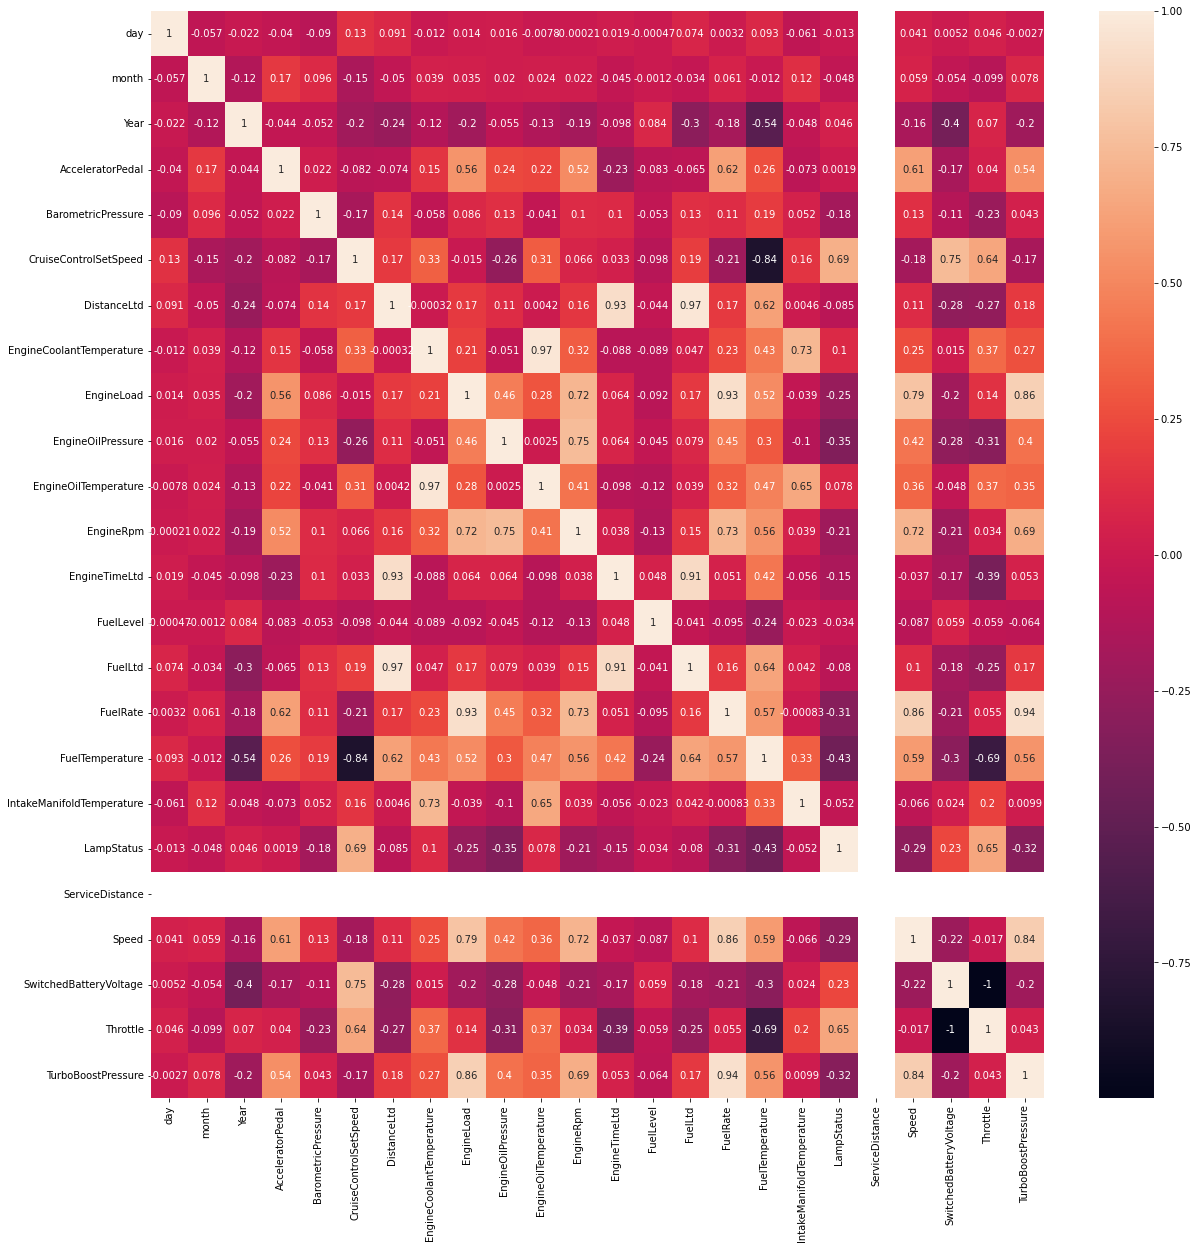

In [17]:
corr = cor_analysis.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(cor_analysis[top_features].corr(), annot =True)

In [18]:
threshold = 0.65

In [19]:
def correlation(cor_analysis, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = cor_analysis.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
              if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i] # getting the nhesame of column
                    col_corr.add(colname)
    return col_corr  

In [20]:
correlation(cor_analysis, threshold)

{'EngineOilTemperature',
 'EngineRpm',
 'EngineTimeLtd',
 'FuelLtd',
 'FuelRate',
 'FuelTemperature',
 'IntakeManifoldTemperature',
 'LampStatus',
 'Speed',
 'SwitchedBatteryVoltage',
 'Throttle',
 'TurboBoostPressure'}

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

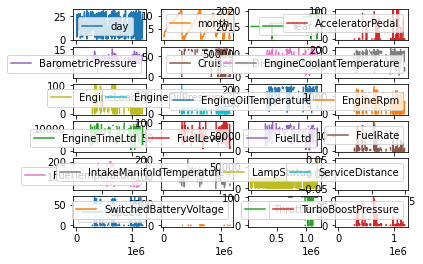

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=4)

cor_analysis.plot(subplots =True, ax=axes)
#cor_analysis.plot(subplots = True, layout=(4,5))

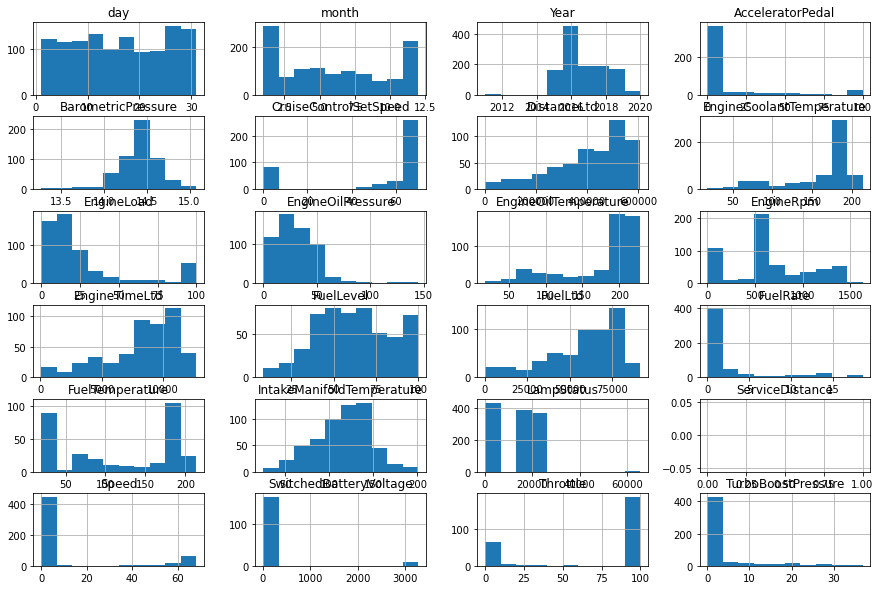

In [22]:
cor_analysis.hist(layout=(6,4), figsize=(15,10))
plt.show()

In [23]:
#removed speed, fuelltd, fuelrate,distanceltd, serviceditance

In [24]:
time_series_analysis = fully_derated[['EventTimeStamp',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure']].set_index('EventTimeStamp')

/home/evgeniya/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>], dtype=object)

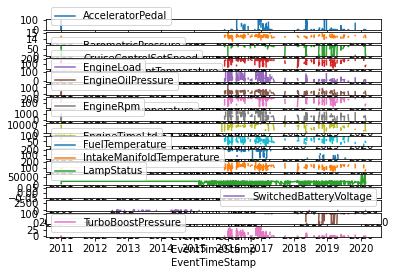

In [25]:
fig, ax = plt.subplots()

time_series_analysis.plot(subplots =True,ax=ax, figsize=(20,20))

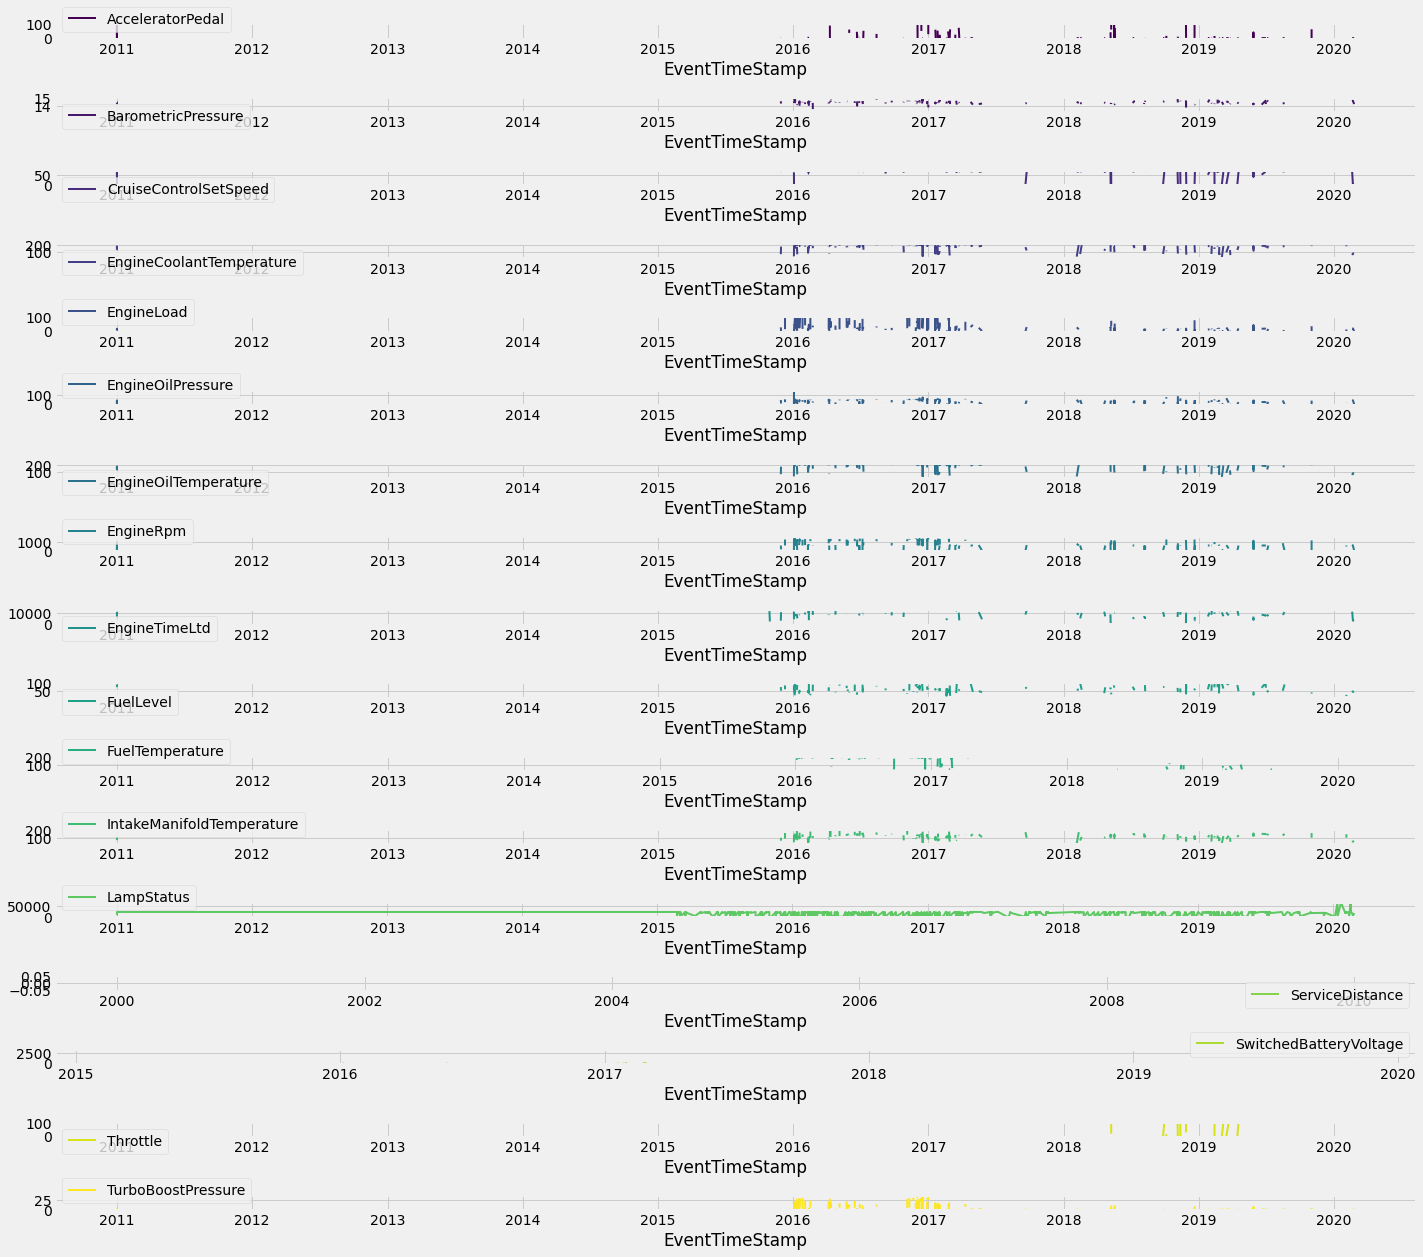

In [26]:
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('fivethirtyeight')
time_series_analysis.plot(subplots= True,
                              layout=(20,1),
                              sharex=False,
                              sharey=False,
                              colormap='viridis',
                              linewidth = 2);
plt.tight_layout();

In [27]:
fortheen_ninety=fully_derated[fully_derated['EquipmentID']==1490]

In [28]:
fortheen_ninety_analysis = fortheen_ninety[['EventTimeStamp', 'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel','FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure']].set_index('EventTimeStamp')

In [29]:
fortheen_ninety_analysis = fortheen_ninety_analysis.fillna(0)

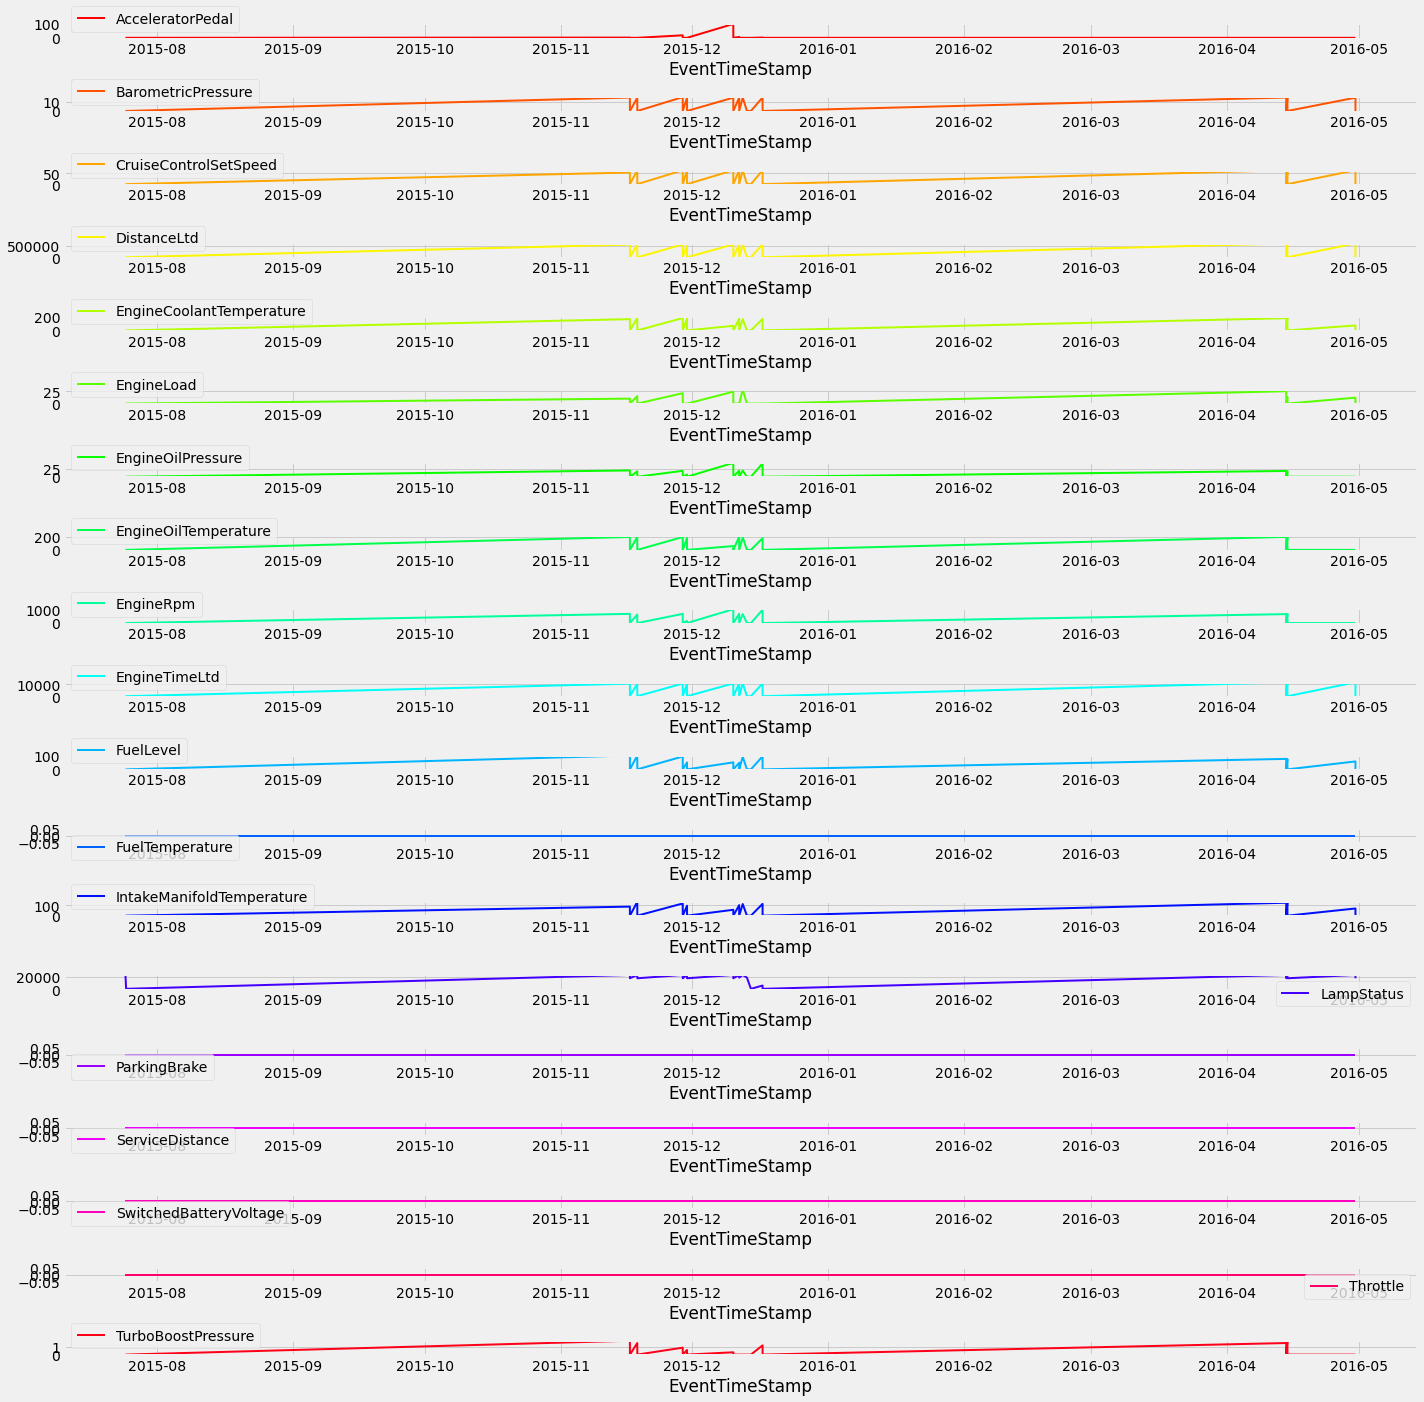

In [30]:
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('fivethirtyeight')
fortheen_ninety_analysis.plot(subplots= True,
                              layout=(20,1),
                              sharex=False,
                              sharey=False,
                              colormap='hsv',
                              linewidth = 2);
plt.tight_layout();

In [31]:
#remove 'CruiseControlSetSpeed', 'DistanceLtd', ' 'ParkingBrake'?

In [32]:
full_dataset = combined.merge(fault_codes, left_on=['spn','fmi'], right_on=['SPN','J1939 FMI'], how='left')
full_dataset.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,Not Mapped,Not Mapped,1.0,111.0,17.0,P2560,Maintenance,Maintenance,Coolant Level - Data Valid But Below Normal Op...,Low engine coolant level detected.
1,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,Not Mapped,Not Mapped,1.0,111.0,17.0,Not Mapped,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...,NaN
2,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,254,0,12.0,629.0,12.0,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
3,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,254,0,12.0,629.0,12.0,P0607,Amber,Warning,Engine Control Module Warning Internal Hardwar...,ECM power supply errors have been detected.
4,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,254,0,12.0,629.0,12.0,Not Mapped,Amber,Warning,Engine Control Module Critical Internal Failur...,ECM Internal failure has occurred.


In [33]:
full_dataset[(full_dataset['spn']==5246)& (full_dataset['EquipmentID']==1490)]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
203952,135899,3664681,2015-07-24 16:39:41,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
204222,136080,3667276,2015-07-24 20:21:22,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
424114,280866,5812787,2015-11-16 17:31:00,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
424115,280867,5812824,2015-11-16 17:47:51,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
427444,283021,5848053,2015-11-18 09:54:49,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
427454,283027,5848105,2015-11-18 10:13:21,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
443666,293425,6018795,2015-11-28 18:44:07,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
443668,293427,6018804,2015-11-28 18:55:50,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
444674,294075,6028563,2015-11-29 18:17:26,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
444676,294077,6028586,2015-11-29 18:21:38,NaN,NaN,04993120*00063662*040213150018*07700044*I0*BBZ*,79488009,6X1u10D1500000000,CMMNS,0,...,Not Mapped,Not Mapped,0.0,5246.0,0.0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...


In [34]:
full_dataset[full_dataset['spn']==5246].groupby('Algorithm Description')['EquipmentID'].size()

Algorithm Description
SCR inducement - Least Severe - Fault Code 3712 is most severe  inducement error.         113
SCR inducement of 5 mph derate - Fault Code 4134 is the least severe inducement error.    790
Name: EquipmentID, dtype: int64

In [35]:
full_dataset[full_dataset['spn']!=5246].groupby('Algorithm Description')['EquipmentID'].size()

Algorithm Description
A calibration mismatch between VGT actuator and the ECM has been detected.                                                                                                                                                                                            125
Accelerator Pedal signal indicates that the accelerator pedal position is above critical limits.                                                                                                                                                                       34
Accelerator Pedal signal indicates that the accelerator pedal sensor circuit frequency is above critical limits.                                                                                                                                                      429
Aftertreatment NOx (Catalyst Exhaust NOx) sensor communication to the ECM via J1939 abnormal                                                                                        

In [45]:
full_dataset[full_dataset['EquipmentID']==1490][['EventTimeStamp','spn','fmi','Cummins Description', 'eventDescription']].head(50)

,EventTimeStamp,spn,fmi,Cummins Description,eventDescription
59633,2015-05-01 15:18:01,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
60320,2015-05-02 06:46:44,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
83212,2015-05-17 16:53:22,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
84558,2015-05-18 13:06:50,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
88967,2015-05-20 15:00:15,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
90026,2015-05-21 06:49:00,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
91455,2015-05-21 17:05:51,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
92618,2015-05-22 09:58:05,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
111384,2015-06-03 18:21:44,652,7,Injector Solenoid Driver Cylinder 2 - Mechanic...,Not Reporting Data Engine Injector Cylinder #02
111385,2015-06-03 18:21:44,652,7,Injector Solenoid Driver Cylinder 2 - Mechanic...,Not Reporting Data Engine Injector Cylinder #02


In [37]:
full_dataset[full_dataset['EquipmentID']==1490][['EventTimeStamp','spn','fmi','Cummins Description']].groupby('EventTimeStamp')[['spn','fmi','Cummins Description']].size()

EventTimeStamp
2015-05-01 15:18:01    1
2015-05-02 06:46:44    1
2015-05-17 16:53:22    1
2015-05-18 13:06:50    1
2015-05-20 15:00:15    1
                      ..
2016-07-19 13:42:28    1
2016-07-20 08:15:51    1
2016-07-20 08:38:09    3
2016-08-07 12:11:06    1
2016-08-08 10:57:24    1
Length: 850, dtype: int64

In [38]:
test1 = full_dataset[full_dataset['EquipmentID']==1490][['EventTimeStamp','spn','fmi','Cummins Description']].groupby(['EventTimeStamp','spn']).size().to_frame().reset_index()

In [39]:
test1

,EventTimeStamp,spn,0
0,2015-05-01 15:18:01,4334,1
1,2015-05-02 06:46:44,4334,1
2,2015-05-17 16:53:22,4334,1
3,2015-05-18 13:06:50,4334,1
4,2015-05-20 15:00:15,4334,1
...,...,...,...
862,2016-07-20 08:15:51,5019,1
863,2016-07-20 08:38:09,2791,2
864,2016-07-20 08:38:09,5019,1
865,2016-08-07 12:11:06,4334,1


In [40]:
#for i in test1.columns:
#    plt.figure()
#    plt.hist(test1[i])

In [41]:
test1 = test1.rename(columns={0:'occr'})
test1

,EventTimeStamp,spn,occr
0,2015-05-01 15:18:01,4334,1
1,2015-05-02 06:46:44,4334,1
2,2015-05-17 16:53:22,4334,1
3,2015-05-18 13:06:50,4334,1
4,2015-05-20 15:00:15,4334,1
...,...,...,...
862,2016-07-20 08:15:51,5019,1
863,2016-07-20 08:38:09,2791,2
864,2016-07-20 08:38:09,5019,1
865,2016-08-07 12:11:06,4334,1


<AxesSubplot:xlabel='EventTimeStamp'>

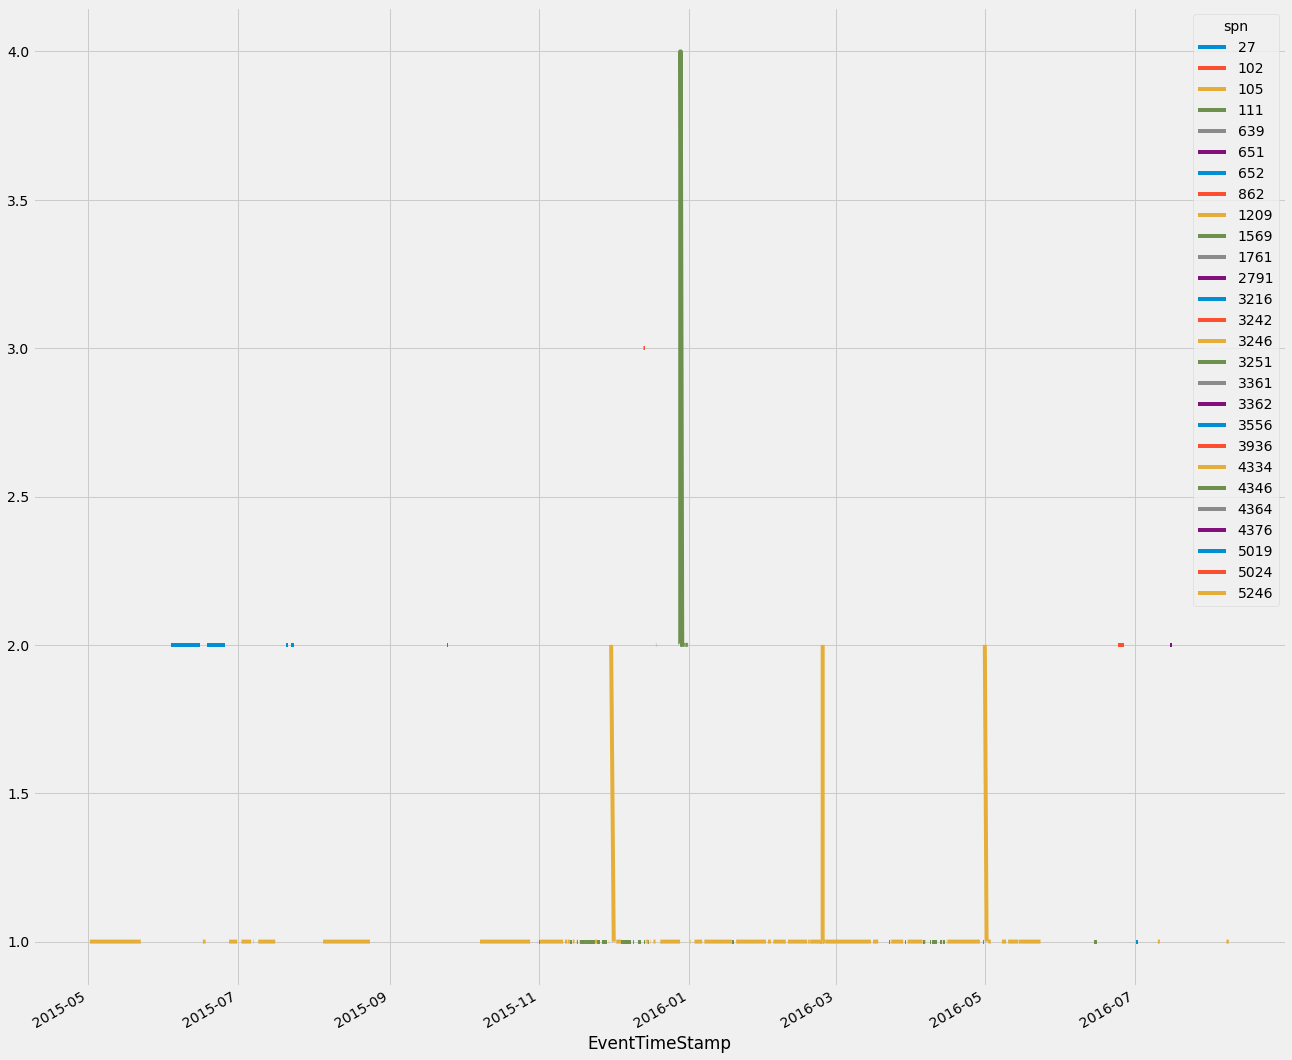

In [42]:
test1.pivot_table(index='EventTimeStamp',columns='spn', values ='occr', aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='EventTimeStamp'>

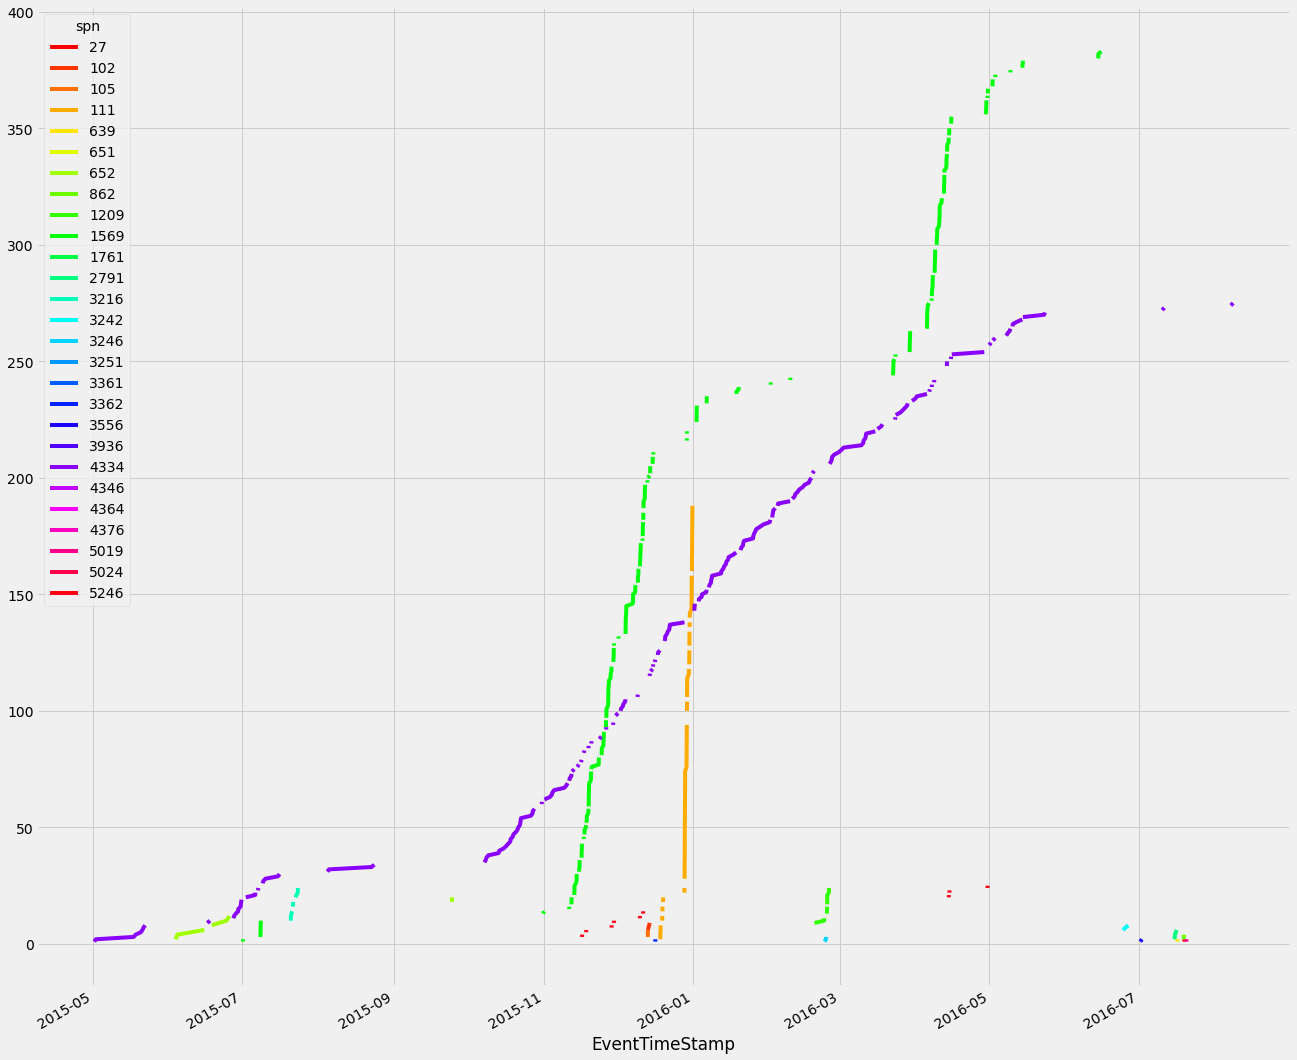

In [43]:
test1_pivoted = test1.pivot_table(index='EventTimeStamp',columns='spn', values ='occr', aggfunc='sum')
test1_pivoted.cumsum().plot(colormap='hsv')

In [44]:
test1_pivoted.cumsum().max()

spn
27        2.0
102      11.0
105       6.0
111     190.0
639       8.0
651      12.0
652      20.0
862       4.0
1209     24.0
1569    383.0
1761      2.0
2791     12.0
3216     28.0
3242      8.0
3246      4.0
3251      2.0
3361      2.0
3362      2.0
3556      2.0
3936      2.0
4334    275.0
4346      2.0
4364      2.0
4376      2.0
5019      2.0
5024      2.0
5246     25.0
dtype: float64

In [47]:
full_dataset[full_dataset['EquipmentID']==1490][['EventTimeStamp','spn','fmi','Cummins Description', 'eventDescription']].drop_duplicates(subset='spn')

,EventTimeStamp,spn,fmi,Cummins Description,eventDescription
59633,2015-05-01 15:18:01,4334,18,Aftertreatment 1 Diesel Exhaust Fluid Pressure...,NaN
111384,2015-06-03 18:21:44,652,7,Injector Solenoid Driver Cylinder 2 - Mechanic...,Not Reporting Data Engine Injector Cylinder #02
132427,2015-06-16 17:00:49,651,7,Injector Solenoid Driver Cylinder 1 - Mechanic...,Not Reporting Data Engine Injector Cylinder #01
158349,2015-07-01 07:01:31,1569,31,Engine Protection Torque Derate - Condition Ex...,Condition Exists Engine Protection Torque Derate
166538,2015-07-06 11:53:25,3216,20,Aftertreatment 1 Intake NOx Sensor - Data Not ...,Data Drifted High Aftertreatment 1 Intake NOx
202661,2015-07-24 08:45:41,5024,10,Aftertreatment 1 Intake NOx Sensor Heater - Ab...,NaN
203952,2015-07-24 16:39:41,5246,0,Aftertreatment SCR Operator Inducement - Data ...,NaN
391012,2015-10-28 14:11:53,1209,2,"Exhaust Gas Pressure 1 - Data Erratic, Intermi...",Incorrect Data Engine Exhaust Gas Pressure
467495,2015-12-11 08:35:09,102,4,Intake Manifold 1 Pressure Sensor Circuit - Vo...,Low Voltage (Engine Intake Manifold #1 Pressure)
470486,2015-12-13 13:49:38,105,3,Intake Manifold 1 Temperature Sensor Circuit -...,High Voltage (Engine Intake Manifold 1 Tempera...


In [48]:
fully_derated[['EquipmentID']]

,EquipmentID
45,1395
1918,1395
2058,1395
2089,1630
2971,1487
...,...
1183032,1814
1183684,2211
1184328,2211
1184330,2211


In [49]:
full_dataset[full_dataset['EquipmentID']==1630][['EventTimeStamp','spn','fmi','Cummins Description', 'eventDescription']].drop_duplicates(subset='spn')

,EventTimeStamp,spn,fmi,Cummins Description,eventDescription
67893,2015-05-07 10:46:05,929,9,NaN,Abnormal Update Rate Tire Location
69247,2015-05-08 08:53:01,596,31,NaN,Condition Exists Cruise Control Enable Switch
70167,2015-05-08 19:30:56,3216,20,Aftertreatment 1 Intake NOx Sensor - Data Not ...,Data Drifted High Aftertreatment 1 Intake NOx
82659,2015-05-17 05:13:39,5848,4,Aftertreatment 1 SCR Intermediate NH3 Sensor -...,NaN
89729,2015-05-21 04:08:24,111,17,Coolant Level - Data Valid But Below Normal Op...,Low (Severity Low) Engine Coolant Level
100913,2015-05-28 03:24:43,97,15,Water in Fuel Indicator - Data Valid But Above...,High (Severity Low) Water In Fuel Indicator
193149,2015-07-20 13:39:17,2863,7,NaN,Not Reporting Data Front Operator Wiper Switch
247221,2015-08-13 15:21:33,1761,17,Aftertreatment 1 Diesel Exhaust Fluid Tank Lev...,Low (Severity Low) Catalyst Tank Level
326130,2015-09-23 16:53:43,639,2,"J1939 Network #1 - Data Erratic, Intermittent,...",Incorrect Data J1939 Network #1 Primary Vehicl...
339559,2015-10-01 07:48:47,641,7,VGT Actuator Driver Circuit (Motor) - Mechanic...,Not Reporting Data Engine Variable Geometry Tu...


In [50]:
full_dataset[full_dataset['EquipmentID']==1487][['EventTimeStamp','spn','fmi','Cummins Description', 'eventDescription']].drop_duplicates(subset='spn')

,EventTimeStamp,spn,fmi,Cummins Description,eventDescription
52337,2015-04-27 14:27:00,168,4,NaN,Low Voltage (Battery Potential / Power Input 1)
52341,2015-04-27 14:35:52,803,4,NaN,Low Voltage (Relay Diagonal 2)
52346,2015-04-27 14:38:02,627,3,NaN,High Voltage (Power Supply (obsolete))
52515,2015-04-27 15:40:35,792,8,NaN,Abnormal Frequency Wheel Sensor ABS Axle 2 Right
52707,2015-04-27 18:04:19,3361,5,Aftertreatment 1 Diesel Exhaust Fluid Dosing U...,Low Current Catalyst Dosing Unit
111927,2015-06-04 03:13:20,639,9,SAE J1939 Multiplexing PGN Timeout Error - Abn...,Abnormal Update Rate J1939 Network #1 Primary ...
167549,2015-07-06 22:56:51,723,7,Engine Speed/Position Camshaft and Crankshaft ...,Not Reporting Data Engine Speed Sensor #2
189955,2015-07-18 05:18:49,157,18,Injector Metering Rail 1 Pressure - Data Valid...,Low (Severity Medium) Engine Injector Metering...
279080,2015-08-28 10:02:55,100,18,Engine Oil Rifle Pressure - Data Valid But Bel...,Low (Severity Medium) Engine Oil Pressure
288128,2015-09-02 17:08:23,524033,31,NaN,NaN


In [51]:
full_dataset[full_dataset['EquipmentID']==2211][['EventTimeStamp','spn','fmi','Cummins Description', 'eventDescription']].drop_duplicates(subset='spn')

,EventTimeStamp,spn,fmi,Cummins Description,eventDescription
1578527,2018-11-05 10:39:48,111,18,Coolant Level - Data Valid But Below Normal Op...,Low (Severity Medium) Engine Coolant Level
1616842,2019-01-18 16:42:31,37,18,NaN,Low (Severity Medium) Transmission Air Tank Pr...
1661428,2019-04-10 06:58:50,792,9,NaN,Abnormal Update Rate Wheel Sensor ABS Axle 2 R...
1678780,2019-05-20 06:06:22,1675,2,NaN,Incorrect Data Engine Starter Mode
1744883,2019-12-06 06:16:16,5394,5,Aftertreatment 1 Diesel Exhaust Fluid Dosing V...,NaN
1744931,2019-12-06 08:28:31,5246,16,Aftertreatment SCR Operator Inducement Severit...,NaN
1763002,2020-02-04 06:43:14,639,2,"J1939 Network #1 - Data Erratic, Intermittent,...",Incorrect Data J1939 Network #1 Primary Vehicl...
1763004,2020-02-04 06:43:14,1483,9,NaN,Abnormal Update Rate Source Address of Control...
1763005,2020-02-04 06:43:18,190,9,NaN,Abnormal Update Rate Engine Speed
1763006,2020-02-04 06:43:16,1231,8,NaN,Abnormal Frequency J1939 Network #2


In [55]:
#full_dataset[full_dataset['spn']==5246][['EventTimeStamp','EquipmentID','spn','fmi','CuminsDescription']]